# CREMA-D Dataset Exploration

This notebook explores the RAVDESS dataset for audio-based emotion recognition. The dataset contains emotional speech and song recordings from 24 professional actors (12 female, 12 male), expressing 8 different emotions.

We'll explore:
1. Dataset structure and statistics
2. Audio waveforms for different emotions
3. Spectrograms and Mel-spectrograms
4. MFCCs and other acoustic features

In [42]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import seaborn as sns
from IPython.display import Audio
from tqdm.notebook import tqdm

# Add the src directory to the path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import load_config, plot_waveform, plot_spectrogram, plot_mel_spectrogram, plot_mfcc
from src.cremad_loader import CREMADDataLoader

# Set some plotting parameters
sns.set_context("notebook", font_scale=1.5)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Load the Dataset

In [43]:
# Fix the dataset path
abs_path = os.path.abspath(os.path.join('..', 'data', 'raw', 'cremad'))
print(f"Setting dataset path to: {abs_path}")

# Create data loader with correct path
data_loader = CREMADDataLoader('../config.yaml')
data_loader.dataset_path = abs_path  # Override the path from config

# Load the dataset
metadata_df, audio_data = data_loader.load_dataset()
print(f"Loaded {len(metadata_df)} samples")

# Load configuration
config = load_config(os.path.join('../config.yaml'))
print("Configuration loaded successfully")

# Fix dataset path to use absolute path
abs_path = os.path.abspath(os.path.join('..', 'data', 'raw', 'cremad'))
print(f"Setting dataset path to: {abs_path}")
config['dataset']['cremad']['path'] = abs_path

# Initialize data loader
data_loader = CREMADDataLoader('../config.yaml')
data_loader.config = config  # Override with corrected path
data_loader.dataset_path = abs_path

# Let's load a subset of the data first for quick exploration
metadata_df, audio_data = data_loader.load_dataset()

print(f"Loaded {len(metadata_df)} samples")

2025-04-10 11:32:18,113 - src.cremad_loader - INFO - Found 7442 audio files


Setting dataset path to: c:\Users\Ogsaurab\Documents\Github\audio_emotion_recognition\data\raw\cremad


Processing metadata: 100%|██████████| 7442/7442 [00:00<00:00, 282669.03it/s]
2025-04-10 11:32:18,148 - src.cremad_loader - INFO - Samples per emotion:
emotion
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64
2025-04-10 11:32:18,148 - src.cremad_loader - INFO - Samples per intensity:
intensity
unspecified    6076
high            455
low             455
medium          455
unknown           1
Name: count, dtype: int64
2025-04-10 11:32:18,149 - src.cremad_loader - INFO - Samples per gender:
gender
male      3935
female    3507
Name: count, dtype: int64
Loading audio: 100%|██████████| 7442/7442 [00:01<00:00, 3933.25it/s]
2025-04-10 11:32:20,108 - src.cremad_loader - INFO - Found 7442 audio files


Loaded 7442 samples
Configuration loaded successfully
Setting dataset path to: c:\Users\Ogsaurab\Documents\Github\audio_emotion_recognition\data\raw\cremad


Processing metadata: 100%|██████████| 7442/7442 [00:00<00:00, 379344.83it/s]
2025-04-10 11:32:20,133 - src.cremad_loader - INFO - Samples per emotion:
emotion
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64
2025-04-10 11:32:20,134 - src.cremad_loader - INFO - Samples per intensity:
intensity
unspecified    6076
high            455
low             455
medium          455
unknown           1
Name: count, dtype: int64
2025-04-10 11:32:20,134 - src.cremad_loader - INFO - Samples per gender:
gender
male      3935
female    3507
Name: count, dtype: int64
Loading audio: 100%|██████████| 7442/7442 [00:01<00:00, 4088.21it/s]

Loaded 7442 samples


## 2. Explore Dataset Metadata

In [44]:
# Display basic statistics
print("Dataset overview:")
print(metadata_df.info())

print("\nSample entries:")
metadata_df.head()

Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   file_path       7442 non-null   object
 1   actor_id        7442 non-null   object
 2   sentence_id     7442 non-null   object
 3   emotion_code    7442 non-null   object
 4   emotion         7442 non-null   object
 5   intensity_code  7442 non-null   object
 6   intensity       7442 non-null   object
 7   gender          7442 non-null   object
dtypes: object(8)
memory usage: 465.3+ KB
None

Sample entries:


,file_path,actor_id,sentence_id,emotion_code,emotion,intensity_code,intensity,gender
0,c:\Users\Ogsaurab\Documents\Github\audio_emoti...,1001,DFA,ANG,angry,XX,unspecified,female
1,c:\Users\Ogsaurab\Documents\Github\audio_emoti...,1001,DFA,DIS,disgust,XX,unspecified,female
2,c:\Users\Ogsaurab\Documents\Github\audio_emoti...,1001,DFA,FEA,fear,XX,unspecified,female
3,c:\Users\Ogsaurab\Documents\Github\audio_emoti...,1001,DFA,HAP,happy,XX,unspecified,female
4,c:\Users\Ogsaurab\Documents\Github\audio_emoti...,1001,DFA,NEU,neutral,XX,unspecified,female


2025-04-10 11:32:22,043 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-10 11:32:22,046 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


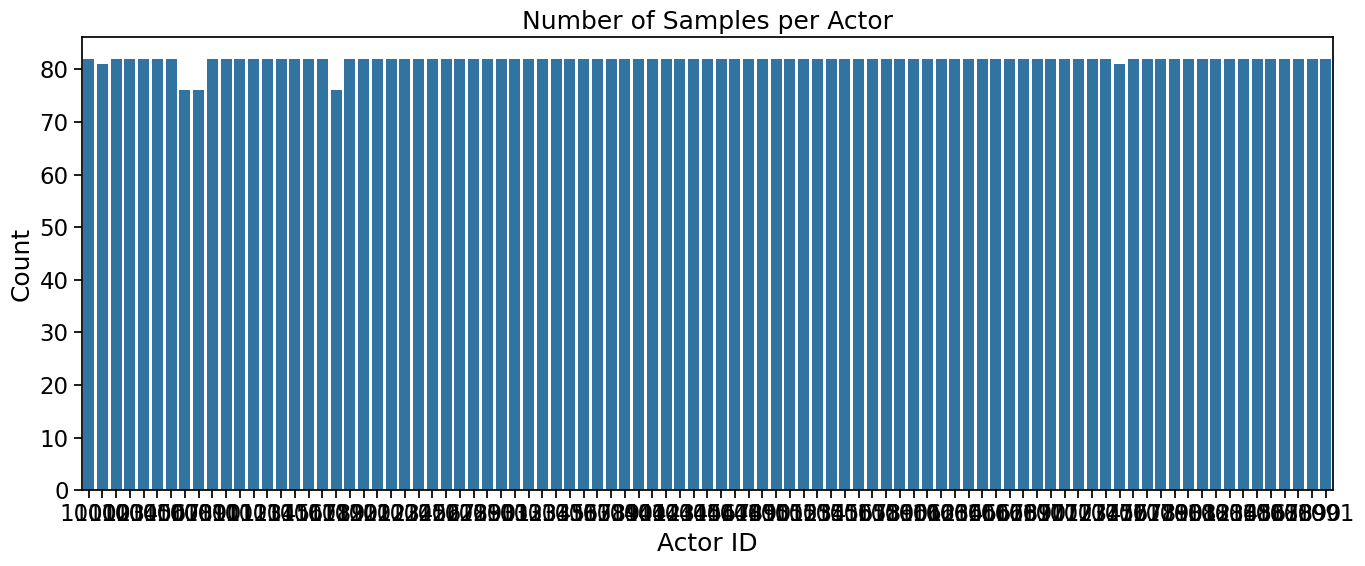

gender
male      3935
female    3507
Name: count, dtype: int64


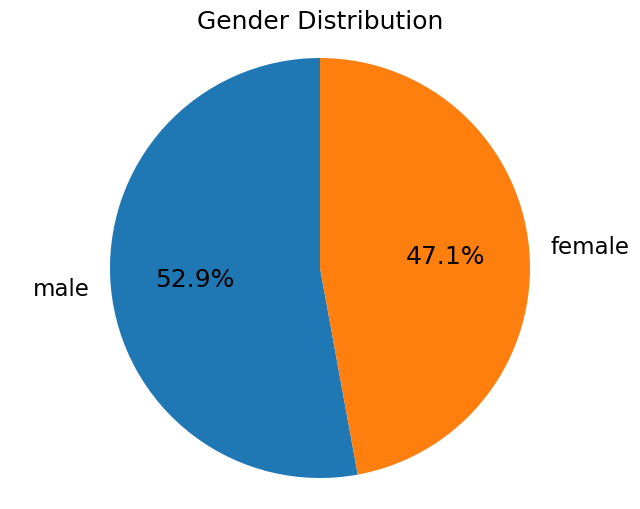

In [45]:
# Count samples per actor
plt.figure(figsize=(14, 6))
actor_counts = metadata_df['actor_id'].value_counts().sort_index()
sns.barplot(x=actor_counts.index, y=actor_counts.values)
plt.title('Number of Samples per Actor')
plt.xlabel('Actor ID')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Gender distribution
# In RAVDESS, actors 1-12 are female, 13-24 are male
plt.figure(figsize=(8, 6))
gender_counts = metadata_df['gender'].value_counts()
print(gender_counts)
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

## 3. Explore Audio Waveforms

In [46]:
# Let's select one sample from each emotion
emotion_samples = {}
for emotion in metadata_df['emotion'].unique():
    # Get first sample of each emotion
    sample_idx = metadata_df[metadata_df['emotion'] == emotion].index[0]
    emotion_samples[emotion] = {
        'metadata': metadata_df.loc[sample_idx],
        'audio_data': audio_data[sample_idx]
    }

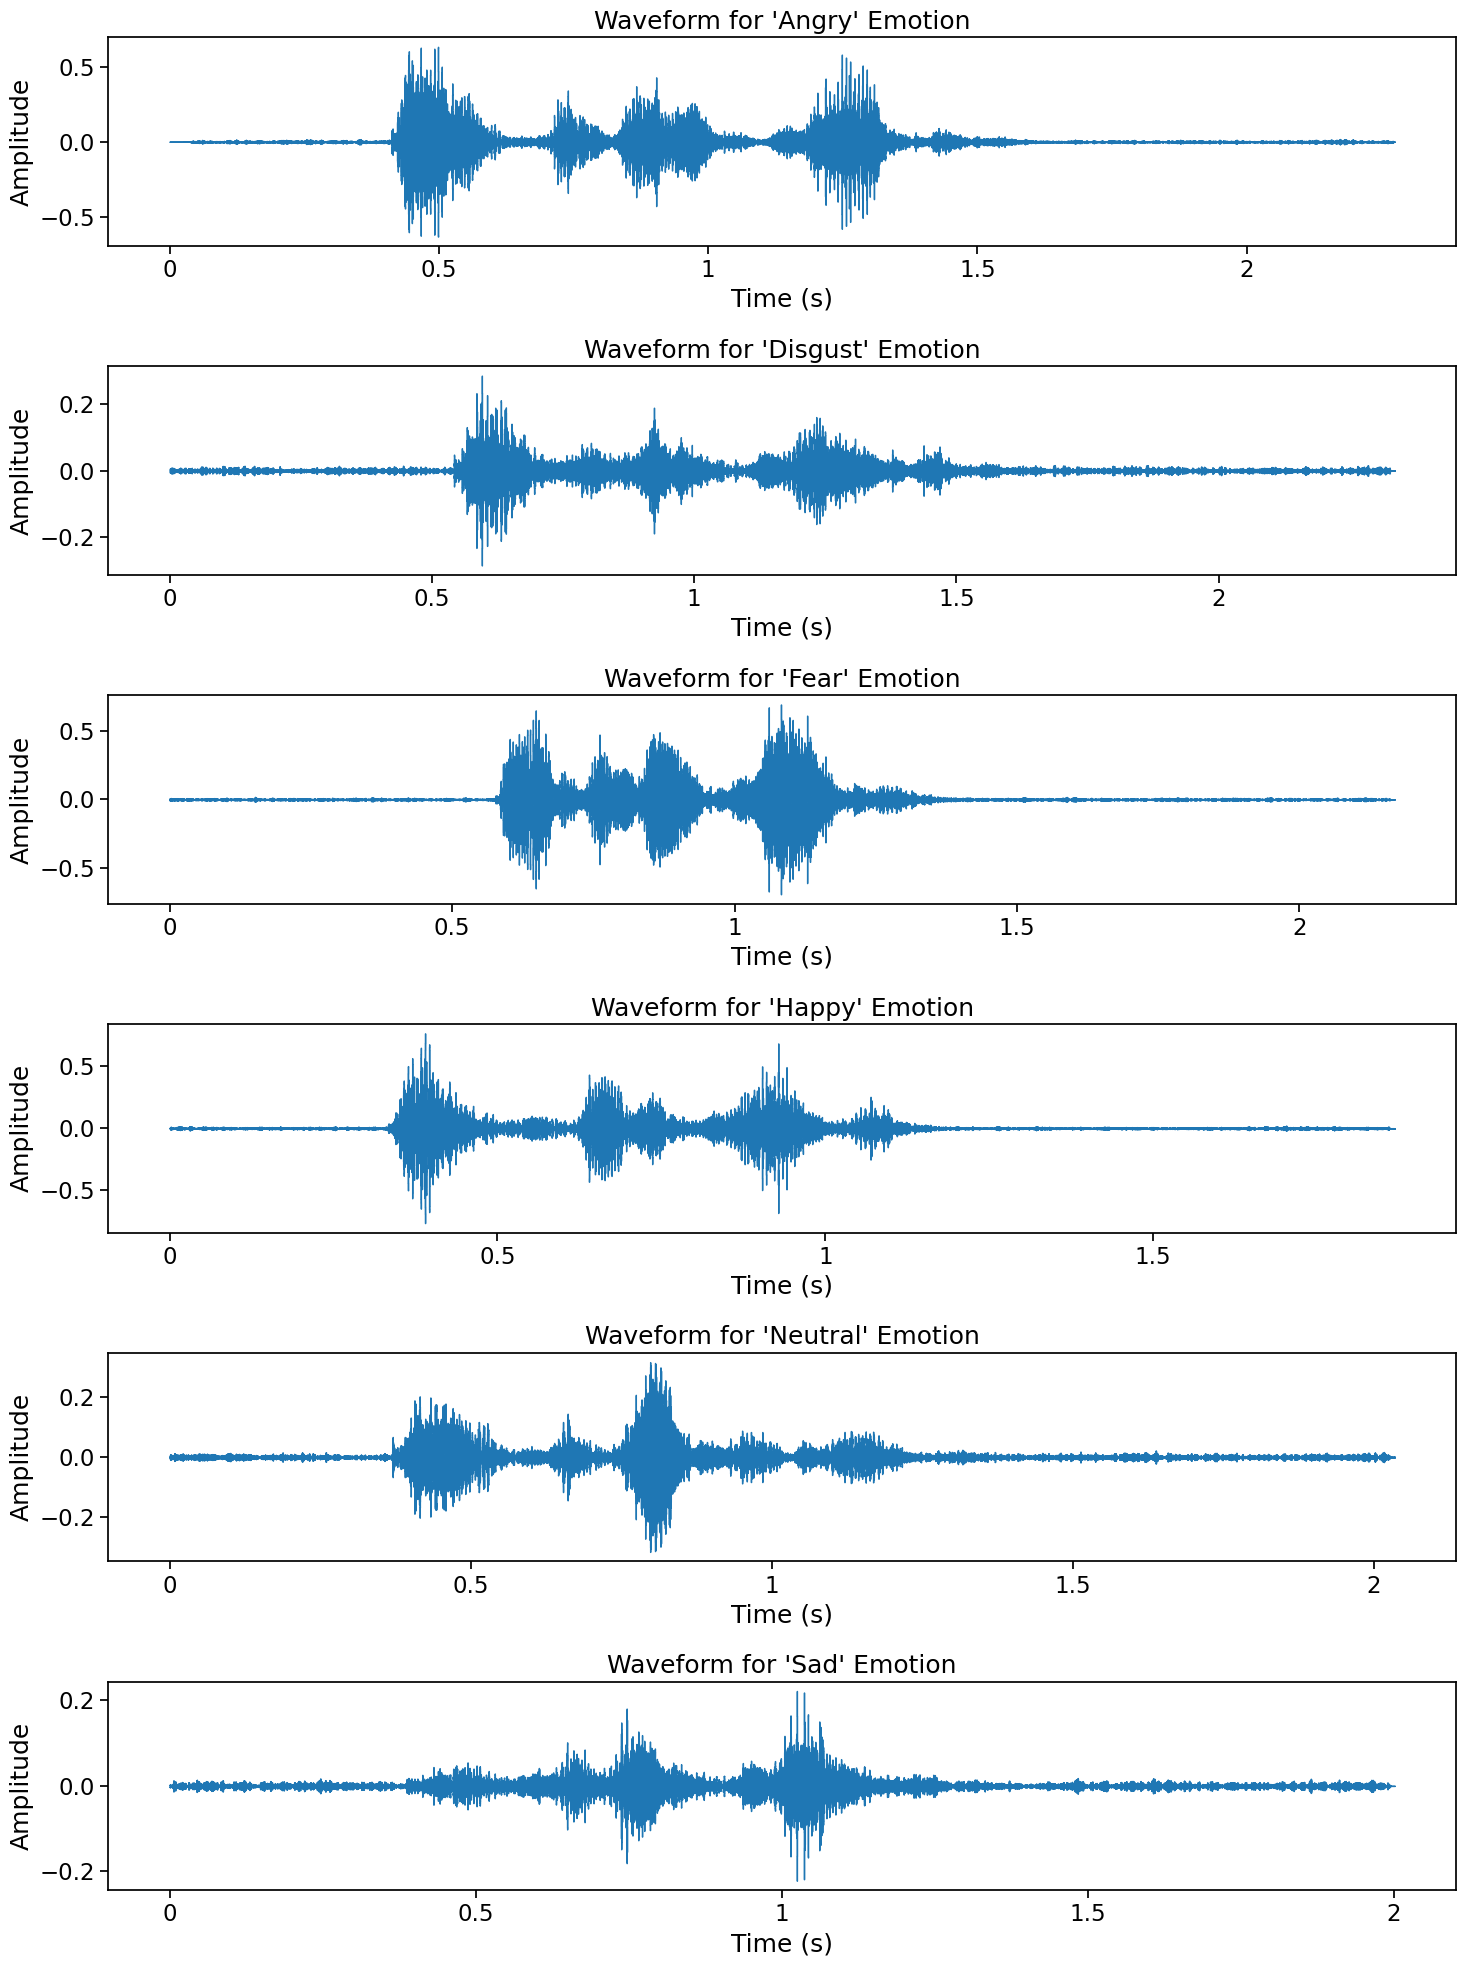

In [47]:
# Plot waveforms for each emotion
plt.figure(figsize=(15, 20))
for i, (emotion, sample) in enumerate(emotion_samples.items(), 1):
    y, sr = sample['audio_data']
    plt.subplot(len(emotion_samples), 1, i)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform for '{emotion.capitalize()}' Emotion")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [48]:
# Let's listen to a sample for each emotion
for emotion, sample in emotion_samples.items():
    y, sr = sample['audio_data']
    print(f"Audio sample for '{emotion.capitalize()}' emotion:")
    display(Audio(y, rate=sr))

Audio sample for 'Angry' emotion:


Audio sample for 'Disgust' emotion:


Audio sample for 'Fear' emotion:


Audio sample for 'Happy' emotion:


Audio sample for 'Neutral' emotion:


Audio sample for 'Sad' emotion:


## 4. Explore Spectrograms

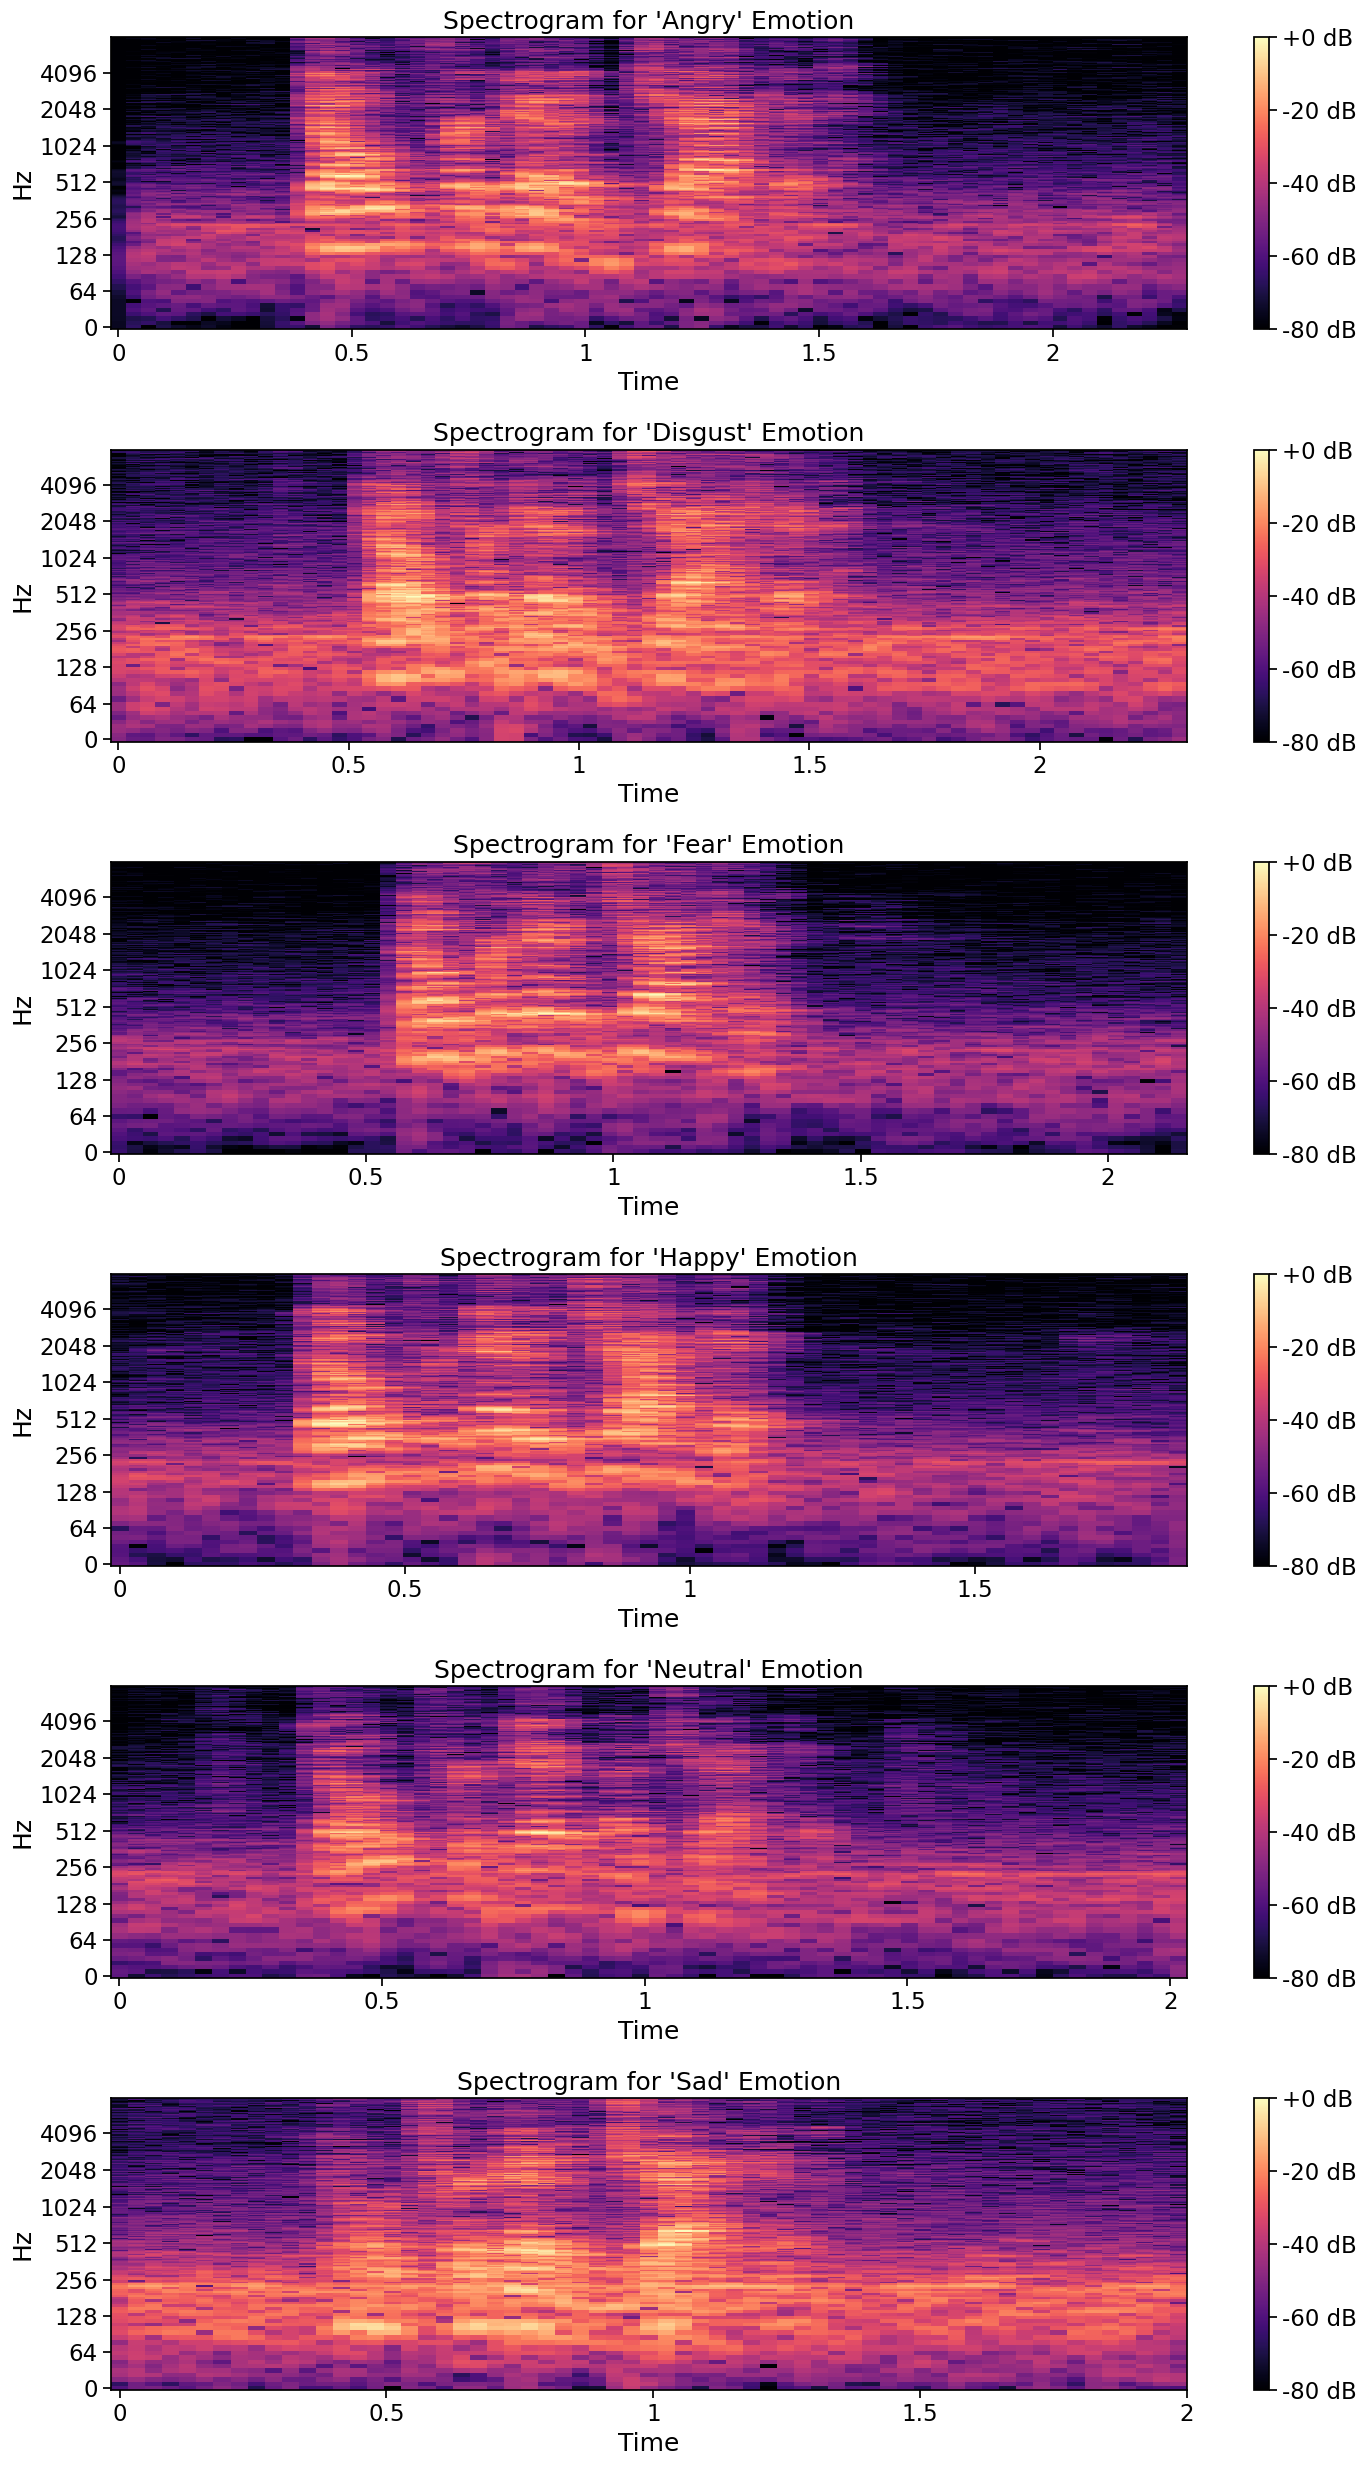

In [49]:
# Plot spectrograms for each emotion
plt.figure(figsize=(15, 25))
for i, (emotion, sample) in enumerate(emotion_samples.items(), 1):
    y, sr = sample['audio_data']
    
    # Compute spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    
    plt.subplot(len(emotion_samples), 1, i)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram for '{emotion.capitalize()}' Emotion")
    
plt.tight_layout()
plt.show()

## 5. Explore Mel Spectrograms

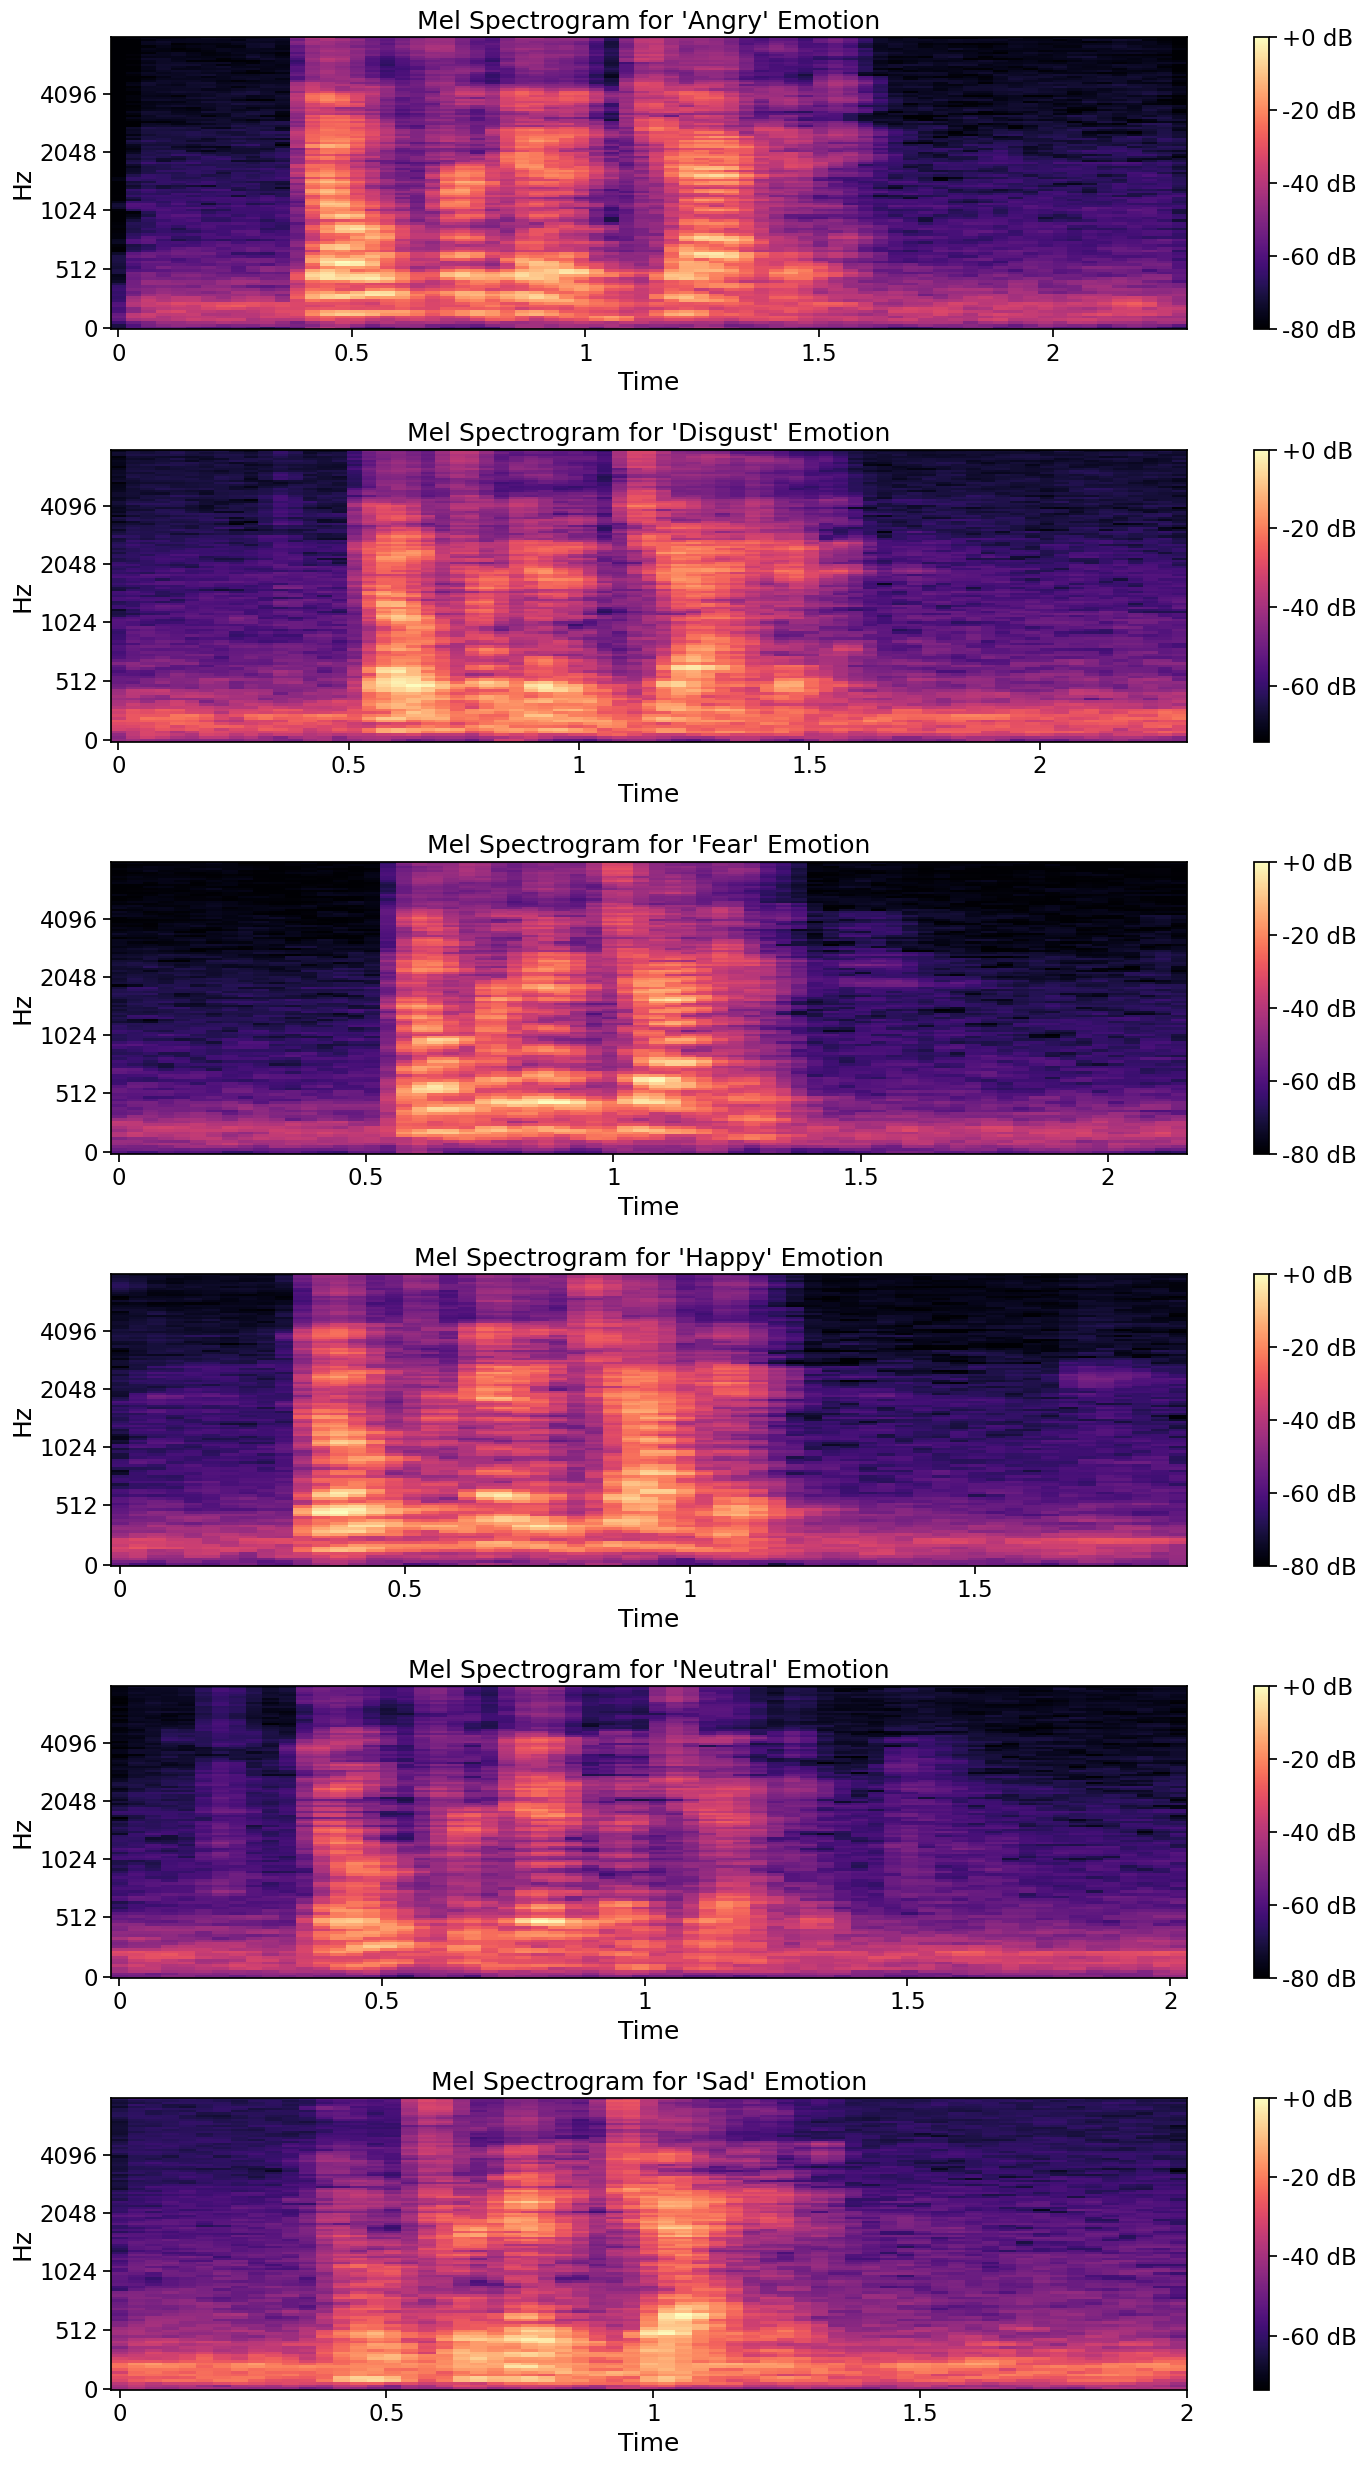

In [50]:
# Plot mel spectrograms for each emotion
plt.figure(figsize=(15, 25))
for i, (emotion, sample) in enumerate(emotion_samples.items(), 1):
    y, sr = sample['audio_data']
    
    # Compute mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    
    plt.subplot(len(emotion_samples), 1, i)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel Spectrogram for '{emotion.capitalize()}' Emotion")
    
plt.tight_layout()
plt.show()

## 6. Explore MFCCs

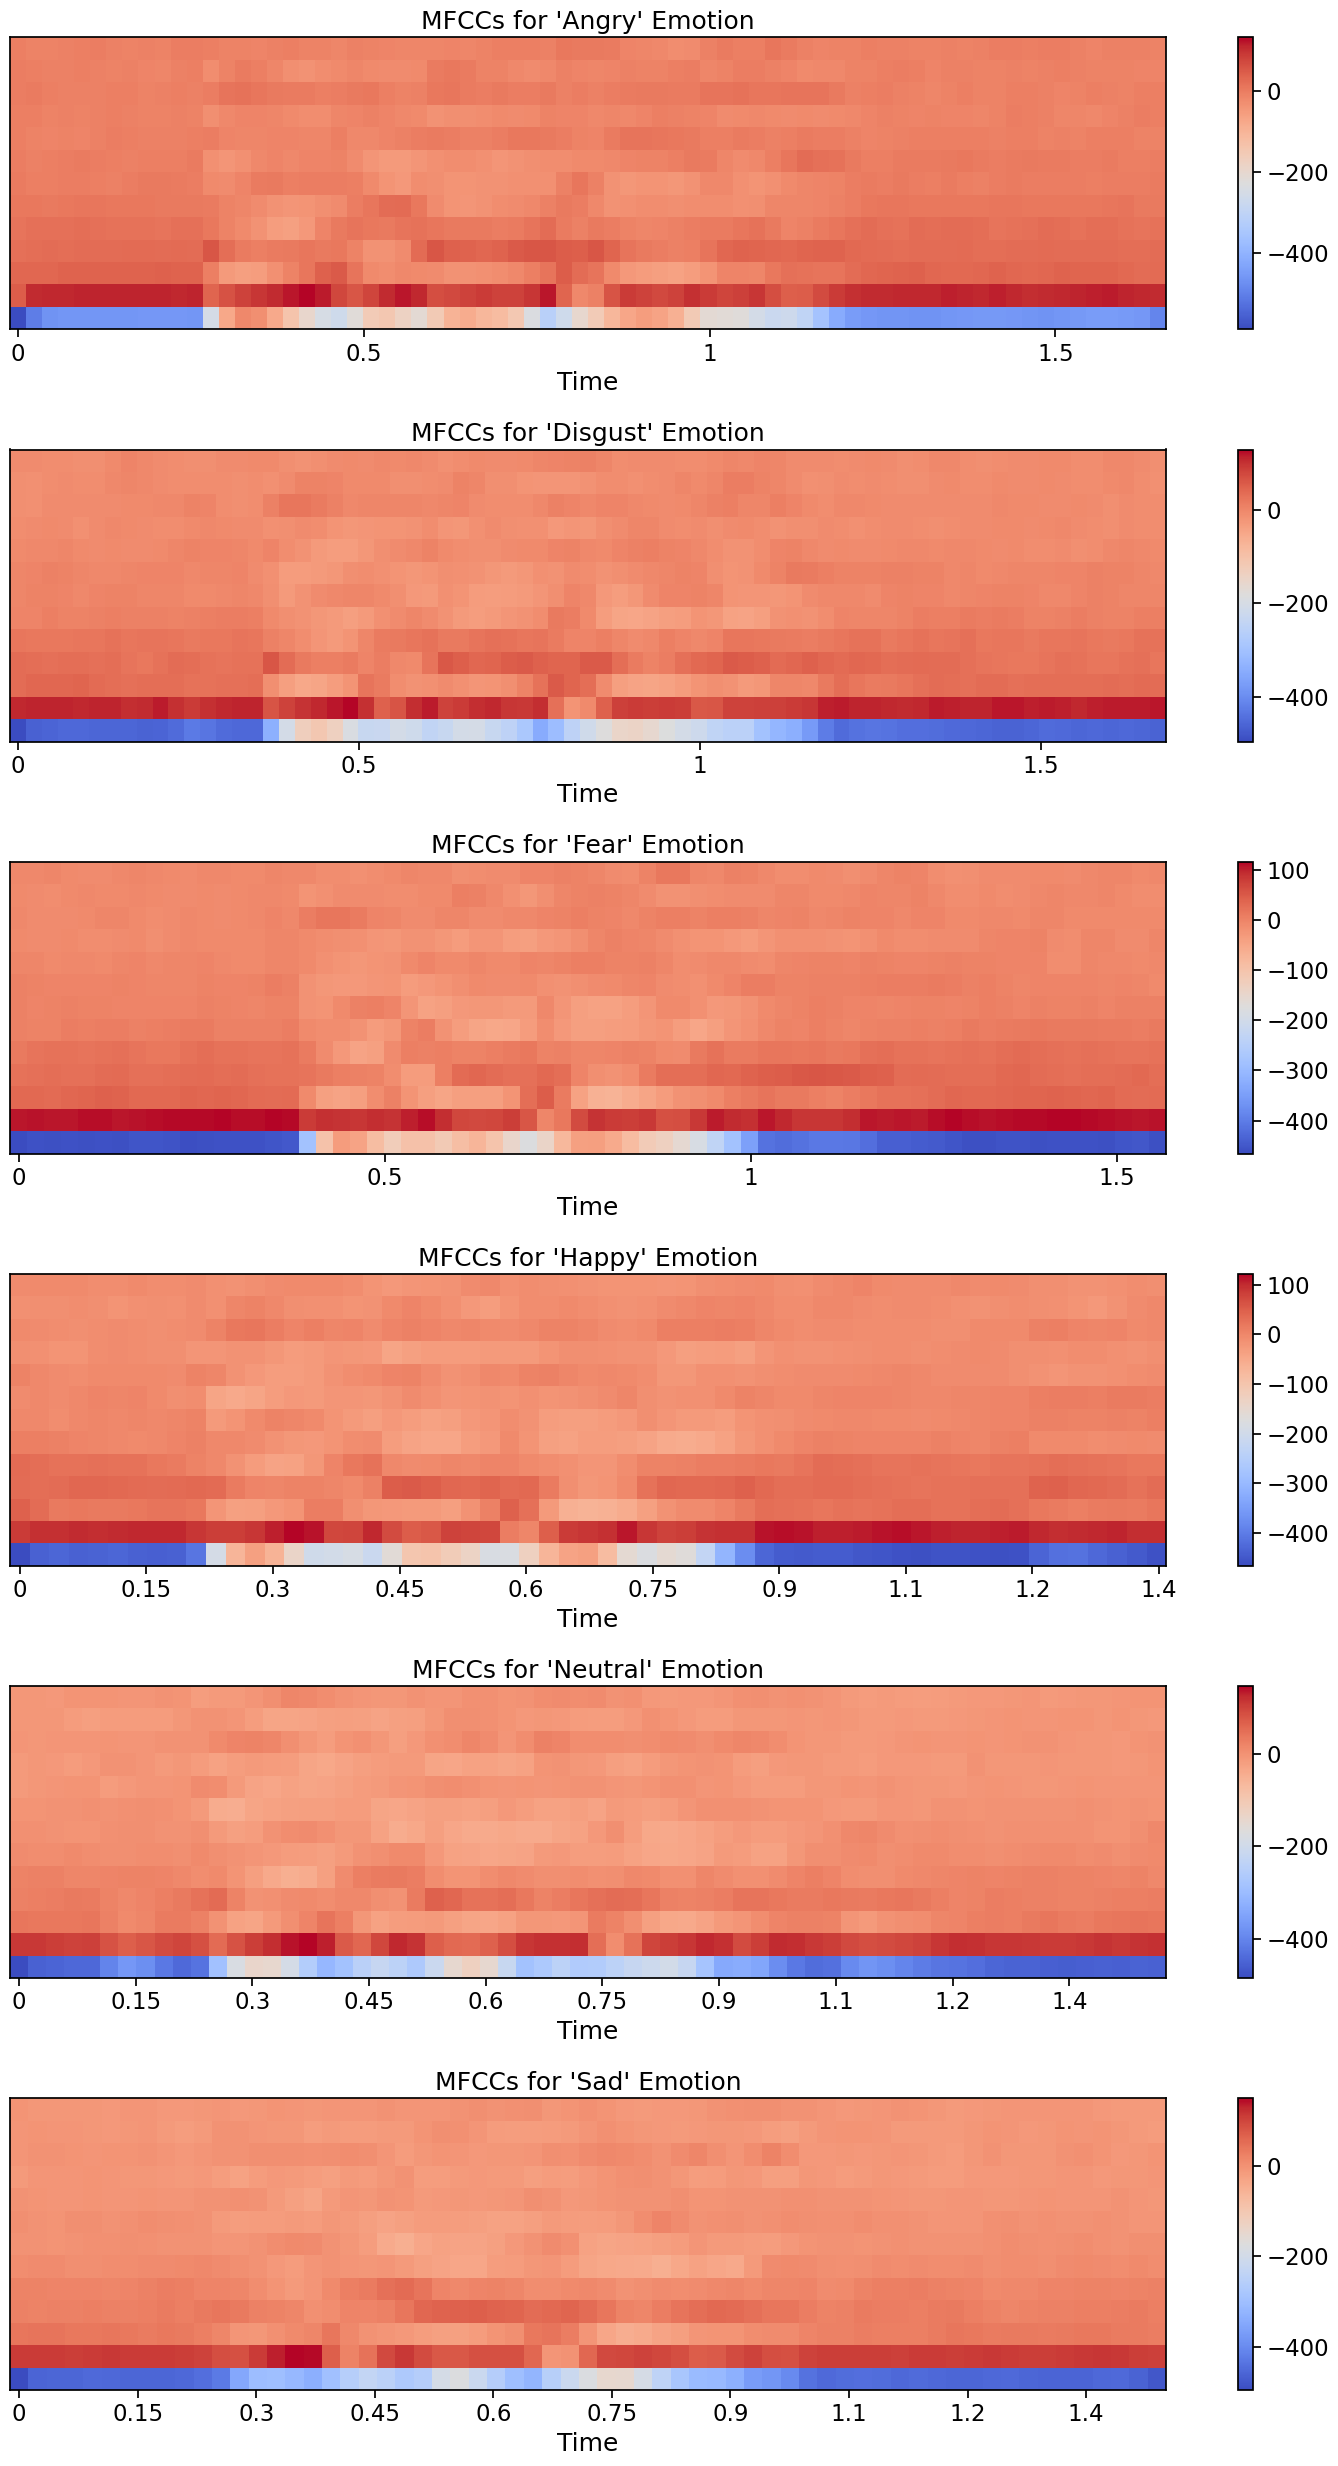

In [51]:
# Plot MFCCs for each emotion
plt.figure(figsize=(15, 25))
for i, (emotion, sample) in enumerate(emotion_samples.items(), 1):
    y, sr = sample['audio_data']
    
    # Compute MFCCs
    n_mfcc = 13  # Number of MFCCs to compute
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    
    plt.subplot(len(emotion_samples), 1, i)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCCs for '{emotion.capitalize()}' Emotion")
    
plt.tight_layout()
plt.show()

## 7. Calculate and Compare Basic Audio Features

In [52]:
def extract_basic_features(y, sr):
    """Extract basic audio features from audio data"""
    # Compute MFCCs and their statistics
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_means = np.mean(mfccs, axis=1)
    mfcc_vars = np.var(mfccs, axis=1)
    
    # Compute pitch (fundamental frequency using harmonic product spectrum)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_mean = np.mean(pitches[pitches > 0]) if np.any(pitches > 0) else 0
    
    # Compute energy
    energy = np.sum(y**2) / len(y)
    
    # Compute zero crossing rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    
    # Compute spectral features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    
    # Tempo and beats
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    
    return {
        'mfcc_means': mfcc_means,
        'mfcc_vars': mfcc_vars,
        'pitch_mean': pitch_mean,
        'energy': energy,
        'zero_crossing_rate': zcr,
        'spectral_centroid': spectral_centroid,
        'spectral_rolloff': spectral_rolloff,
        'spectral_bandwidth': spectral_bandwidth,
        'tempo': tempo
    }

In [53]:
# Extract features for each emotion sample
emotion_features = {}
for emotion, sample in emotion_samples.items():
    y, sr = sample['audio_data']
    emotion_features[emotion] = extract_basic_features(y, sr)

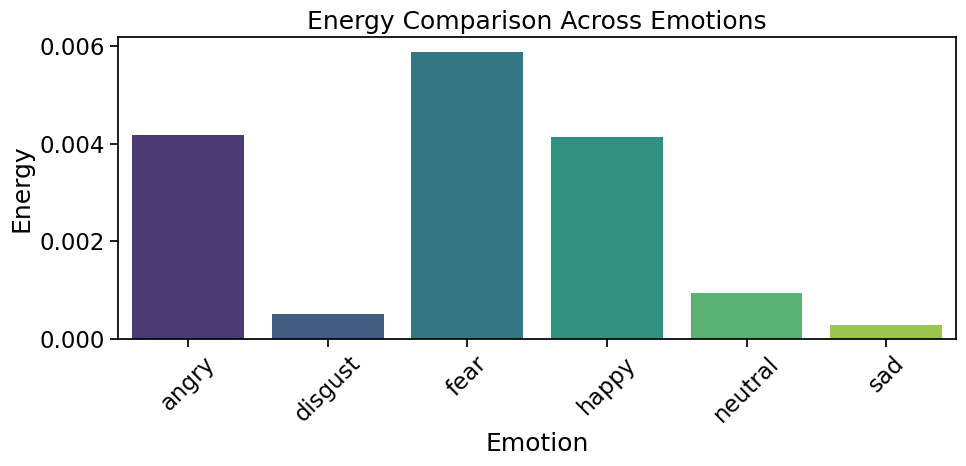

In [54]:
# Compare energy across emotions
plt.figure(figsize=(10, 5))
emotions = list(emotion_features.keys())
energies = [emotion_features[emotion]['energy'] for emotion in emotions]
colors = sns.color_palette("viridis", len(emotions))

ax = sns.barplot(x=emotions, y=energies, palette=colors)
plt.title('Energy Comparison Across Emotions')
plt.xlabel('Emotion')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

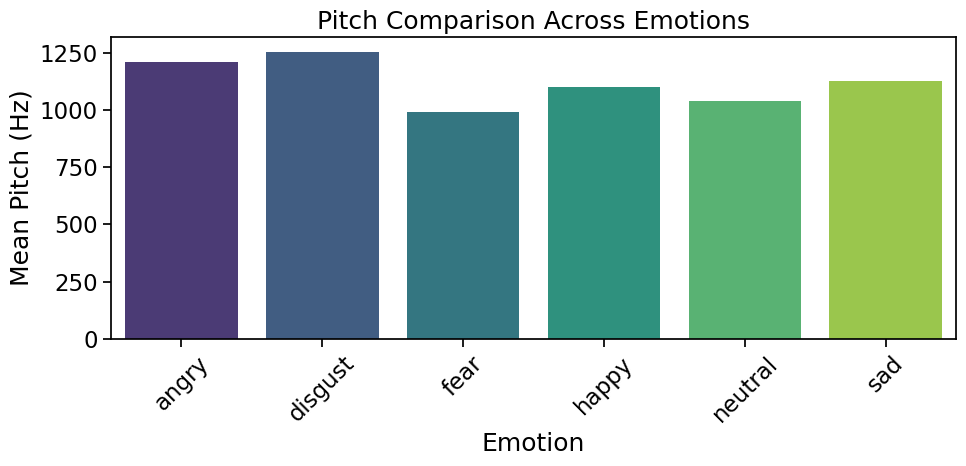

In [55]:
# Compare pitch across emotions
plt.figure(figsize=(10, 5))
pitches = [emotion_features[emotion]['pitch_mean'] for emotion in emotions]

ax = sns.barplot(x=emotions, y=pitches, palette=colors)
plt.title('Pitch Comparison Across Emotions')
plt.xlabel('Emotion')
plt.ylabel('Mean Pitch (Hz)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

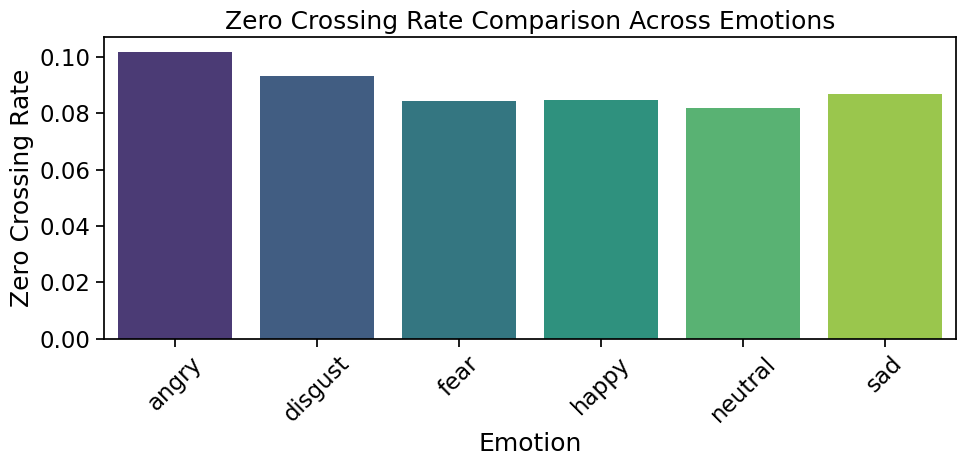

In [56]:
# Compare zero crossing rate across emotions
plt.figure(figsize=(10, 5))
zcrs = [emotion_features[emotion]['zero_crossing_rate'] for emotion in emotions]

ax = sns.barplot(x=emotions, y=zcrs, palette=colors)
plt.title('Zero Crossing Rate Comparison Across Emotions')
plt.xlabel('Emotion')
plt.ylabel('Zero Crossing Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

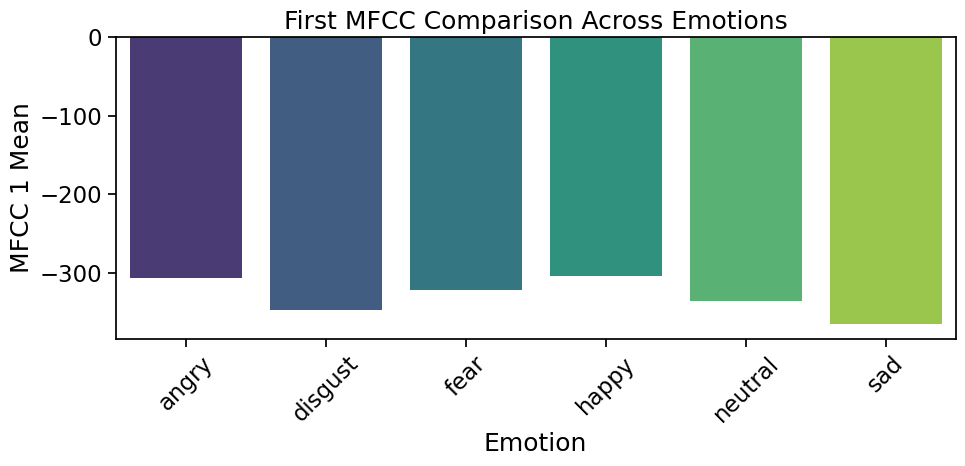

In [57]:
# Compare first MFCC across emotions
plt.figure(figsize=(10, 5))
mfcc1 = [emotion_features[emotion]['mfcc_means'][0] for emotion in emotions]

ax = sns.barplot(x=emotions, y=mfcc1, palette=colors)
plt.title('First MFCC Comparison Across Emotions')
plt.xlabel('Emotion')
plt.ylabel('MFCC 1 Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

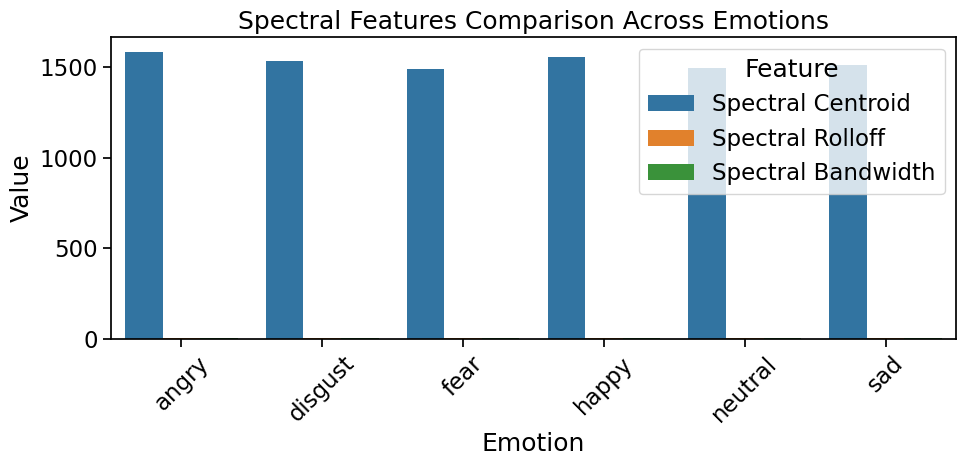

In [58]:
# Compare spectral features across emotions
plt.figure(figsize=(10, 5))

# Prepare data
spectral_features = []
for emotion in emotions:
    spectral_features.append({
        'Emotion': emotion,
        'Spectral Centroid': emotion_features[emotion]['spectral_centroid'],
        'Spectral Rolloff': emotion_features[emotion]['spectral_rolloff'] / 1000,  # Scale down to make visualization better
        'Spectral Bandwidth': emotion_features[emotion]['spectral_bandwidth'] / 1000  # Scale down to make visualization better
    })

df_spectral = pd.DataFrame(spectral_features)
df_spectral_melted = pd.melt(df_spectral, id_vars=['Emotion'], var_name='Feature', value_name='Value')

sns.barplot(x='Emotion', y='Value', hue='Feature', data=df_spectral_melted)
plt.title('Spectral Features Comparison Across Emotions')
plt.xlabel('Emotion')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

# 8. Summary and Observations

Based on our exploratory analysis of the CREMA-D dataset, we can observe the following:

1. **Dataset Balance**: The dataset is well-balanced across emotions with approximately 1271 samples each for angry, disgust, fear, happy, and sad emotions, and 1087 samples for neutral. Gender distribution is also reasonably balanced with 52.9% male (3935 samples) and 47.1% female (3507 samples).

2. **Waveform Patterns**: Different emotions exhibit distinct waveform patterns. For example, 'angry' and 'fearful' emotions tend to have more intense amplitude variations, while 'neutral' and 'sad' emotions show more moderate patterns. The timing and intensity of speech segments also vary noticeably across emotions.

3. **Spectral Characteristics**: Spectrograms and Mel-spectrograms reveal that:
   - 'Happy' and 'angry' emotions contain more high-frequency energy
   - 'Sad' and 'neutral' emotions have more energy concentrated in lower frequencies
   - Emotional intensity is reflected in the energy distribution across frequencies

4. **MFCCs**: There are noticeable differences in MFCC patterns across emotions, suggesting they'll be valuable features for classification. The first MFCC shows particularly distinctive patterns for different emotional states.

5. **Feature Differentiability**:
   - **Energy**: Generally higher for 'fear', 'angry', and 'happy' emotions (around 0.004-0.006), while significantly lower for 'disgust', 'neutral', and 'sad' (below 0.002)
   - **Pitch**: Highest for 'disgust' and 'angry' (around 1250 Hz), followed by 'happy' and 'sad', with 'fear' showing the lowest mean pitch (around 1000 Hz)
   - **Zero Crossing Rate**: Highest for 'angry' (0.10) and 'disgust' (0.09), suggesting more rapid changes in signal polarity for high-arousal emotions
   - **Spectral Features**: Spectral centroid is higher for 'angry', 'disgust', 'fear', and 'happy', indicating more high-frequency content in these emotional expressions

These observations highlight clear acoustic differences between emotional expressions, providing a strong foundation for feature extraction in emotion classification. The combination of temporal (waveform), spectral, and cepstral features should provide complementary information for distinguishing between different emotions.
